In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('thermophilic_train.csv')

In [3]:
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (6515, 3)

Column names: ['uniprot_id', 'tm', 'sequence']

First few rows:
  uniprot_id    tm                                           sequence
0      12389  67.4  MIDIKLLRLNSEIFYKSCRDRGFDTRILDEFFELDNEWKENLKQLN...
1      19819  51.4  MNSSSSTMNEEPDALSVVNQLRDLAADPLNRRAIVQDQGCLPGLIL...
2       6847  50.6  MATRVLHSSCSGLYRAAGPARGKGHATAVIRSLSASHNRPREDSWF...
3       7239  52.5  MCSLGLFPPPPPRGQVTLYEHNNELVTGNSYESPPPDFRGQWINLP...
4       9362  68.6  MELINKYTCKNGVRIVLEQIPTVRSVAIGIWIGTGSRNETEQTNGI...

Data types:
uniprot_id     object
tm            float64
sequence       object
dtype: object


In [4]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage missing:")
print((df.isnull().sum() / len(df)) * 100)

Missing values per column:
uniprot_id    0
tm            0
sequence      0
dtype: int64

Percentage missing:
uniprot_id    0.0
tm            0.0
sequence      0.0
dtype: float64


Sequence length statistics:
count    6515.000000
mean      360.140599
std       205.539401
min        33.000000
25%       207.000000
50%       319.000000
75%       467.000000
max      1524.000000
Name: seq_length, dtype: float64


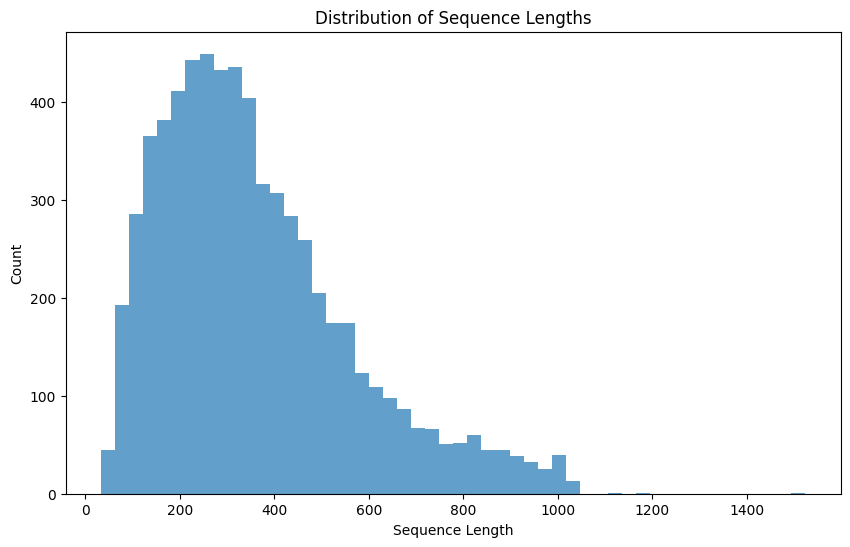


Sequences likely to be RuBisCO large subunit (450-500 AA): 408
Sequences likely to be RuBisCO small subunit (100-150 AA): 567


In [5]:
seq_col = 'sequence' 

# Calculate sequence lengths
df['seq_length'] = df[seq_col].str.len()

print("Sequence length statistics:")
print(df['seq_length'].describe())

# Plot sequence length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['seq_length'], bins=50, alpha=0.7)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.show()

# Check if sequences are around RuBisCO subunit sizes
rubisco_large = df[(df['seq_length'] >= 450) & (df['seq_length'] <= 500)]
rubisco_small = df[(df['seq_length'] >= 100) & (df['seq_length'] <= 150)]

print(f"\nSequences likely to be RuBisCO large subunit (450-500 AA): {len(rubisco_large)}")
print(f"Sequences likely to be RuBisCO small subunit (100-150 AA): {len(rubisco_small)}")

Temperature statistics:
count    6515.000000
mean       62.666063
std        13.045969
min        50.000000
25%        52.200000
50%        56.200000
75%        71.900000
max        99.000000
Name: tm, dtype: float64


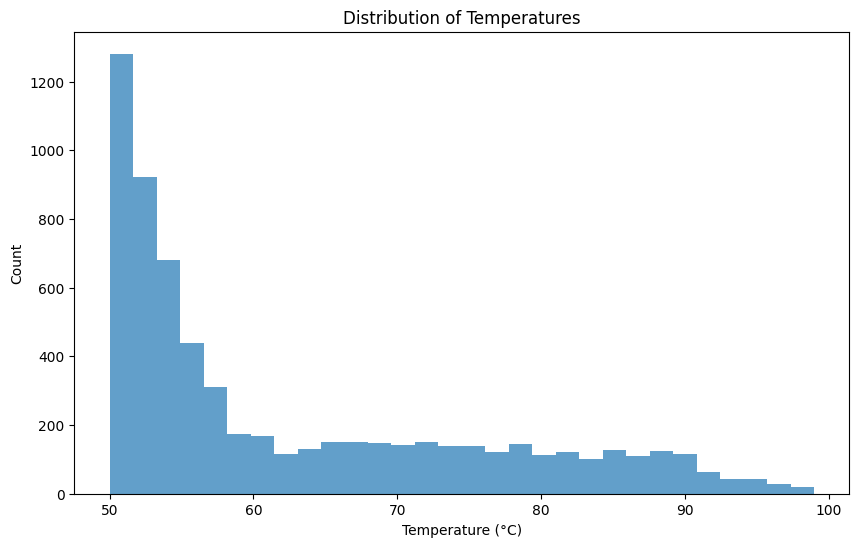


Temperature range: 50.0°C to 99.0°C
Moderately thermophilic (50-70°C): 4703
Highly thermophilic (70-90°C): 1574
Extremely thermophilic (>90°C): 243


In [6]:
temp_col = 'tm'

print("Temperature statistics:")
print(df[temp_col].describe())

# Temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(df[temp_col], bins=30, alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Distribution of Temperatures')
plt.show()

# Temperature ranges
print(f"\nTemperature range: {df[temp_col].min()}°C to {df[temp_col].max()}°C")
print(f"Moderately thermophilic (50-70°C): {len(df[(df[temp_col] >= 50) & (df[temp_col] <= 70)])}")
print(f"Highly thermophilic (70-90°C): {len(df[(df[temp_col] >= 70) & (df[temp_col] <= 90)])}")
print(f"Extremely thermophilic (>90°C): {len(df[df[temp_col] > 90])}")

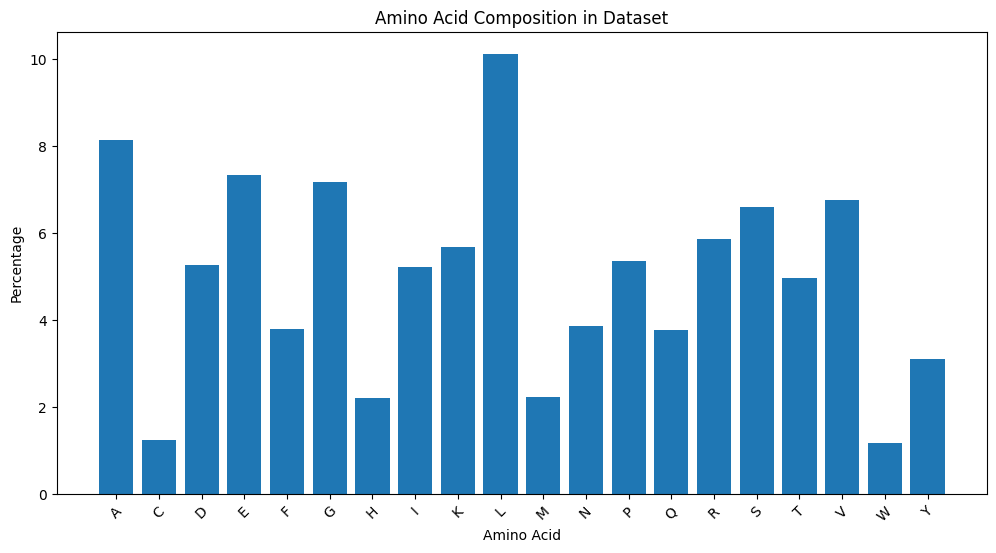


Charged residues (D,E,K,R): 24.2%
Hydrophobic residues (I,L,V,A,F,W): 35.2%


In [7]:
# Get all sequences as one long string
all_sequences = ''.join(df[seq_col].dropna())

# Count amino acids
aa_counts = {}
for aa in 'ACDEFGHIKLMNPQRSTVWY':
    aa_counts[aa] = all_sequences.count(aa)

# Convert to percentages
total_aa = sum(aa_counts.values())
aa_percentages = {aa: (count/total_aa)*100 for aa, count in aa_counts.items()}

# Plot amino acid composition
plt.figure(figsize=(12, 6))
plt.bar(aa_percentages.keys(), aa_percentages.values())
plt.xlabel('Amino Acid')
plt.ylabel('Percentage')
plt.title('Amino Acid Composition in Dataset')
plt.xticks(rotation=45)
plt.show()

# Check for thermostable indicators
charged_aa = sum([aa_percentages.get(aa, 0) for aa in 'DEKR'])
hydrophobic_aa = sum([aa_percentages.get(aa, 0) for aa in 'ILVAFW'])
print(f"\nCharged residues (D,E,K,R): {charged_aa:.1f}%")
print(f"Hydrophobic residues (I,L,V,A,F,W): {hydrophobic_aa:.1f}%")

In [17]:
import pandas as pd
import requests
import time

# Load the Excel file
file_path = 'tm_data_ids.xlsx'
df = pd.read_excel(file_path)



In [18]:
df.head()

,Organism,Phylogenetic Clade,OGT,Reference,Type,# structures in our dataset,PDB_IDs
0,Acidothermus cellulolyticus,Bacteria,55°C,PMID: 19270083,Thermophyles,1,3E11
1,Chloroflexus aurantiacus,Bacteria,60°C,PMID: 6863222,Thermophyles,10,"1GUY, 2RHM, 3KGY, 3NRG, 3PXP, 3QBM, 4E3E, 4L80..."
2,Fervidobacterium islandicum,Bacteria,65°C,"PMID: 16000809, 10.1007/BF00423318",Thermophyles,1,5E3X
3,Fervidobacterium nodosum,Bacteria,65°C- 70°C,10.1007/BF00446741,Thermophyles,1,3NCO
4,Geobacillus stearothermophilus,Bacteria,60°C,PMID: 175753,Thermophyles,87,"1A0D, 1A32, 1B4A, 1BTM, 1C7Q, 1CYG, 1DIV, 1EQJ..."


In [19]:


# Clean and expand PDB_IDs
df['PDB_IDs'] = df['PDB_IDs'].apply(lambda x: str(x).replace(" ", "").split(',') if pd.notnull(x) else [])

# Expand rows: one row per PDB ID
expanded_rows = []

for _, row in df.iterrows():
    for pdb_id in row['PDB_IDs']:
        new_row = row.drop('PDB_IDs').to_dict()
        new_row['PDB_ID'] = pdb_id.upper()
        expanded_rows.append(new_row)

expanded_df = pd.DataFrame(expanded_rows)

# Fetch sequences from RCSB PDB
def fetch_sequence(pdb_id):
    url = f"https://www.rcsb.org/fasta/entry/{pdb_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            fasta = response.text
            # Combine all lines after the header into a single sequence string
            lines = fasta.strip().split('\n')
            sequence = ''.join(lines[1:])  # Skip header line
            return sequence
        else:
            return f"[Error: {response.status_code}]"
    except Exception as e:
        return f"[Exception: {e}]"

# Fetch and add sequences
sequences = []
for i, pdb_id in enumerate(expanded_df['PDB_ID']):
    print(f"Fetching {pdb_id} ({i+1}/{len(expanded_df)})")
    seq = fetch_sequence(pdb_id)
    sequences.append(seq)
    time.sleep(0.5)  # Be polite to the server

expanded_df['Sequence'] = sequences

# Save to new Excel file
output_path = 'expanded_with_sequences.xlsx'
expanded_df.to_excel(output_path, index=False)

print(f"\n✅ Done! Sequences saved to: {output_path}")


Fetching 3E11 (1/1395)
Fetching 1GUY (2/1395)
Fetching 2RHM (3/1395)
Fetching 3KGY (4/1395)
Fetching 3NRG (5/1395)
Fetching 3PXP (6/1395)
Fetching 3QBM (7/1395)
Fetching 4E3E (8/1395)
Fetching 4L80 (9/1395)
Fetching 4YWS (10/1395)
Fetching 5D1V (11/1395)
Fetching 5E3X (12/1395)
Fetching 3NCO (13/1395)
Fetching 1A0D (14/1395)
Fetching 1A32 (15/1395)
Fetching 1B4A (16/1395)
Fetching 1BTM (17/1395)
Fetching 1C7Q (18/1395)
Fetching 1CYG (19/1395)
Fetching 1DIV (20/1395)
Fetching 1EQJ (21/1395)
Fetching 1G2W (22/1395)
Fetching 1H2E (23/1395)
Fetching 1HUS (24/1395)
Fetching 1HUU (25/1395)
Fetching 1I6L (26/1395)
Fetching 1J0H (27/1395)
Fetching 1K1D (28/1395)
Fetching 1KL1 (29/1395)
Fetching 1KNV (30/1395)
Fetching 1L6G (31/1395)
Fetching 1L8N (32/1395)
Fetching 1LDN (33/1395)
Fetching 1LQY (34/1395)
Fetching 1MIW (35/1395)
Fetching 1PHP (36/1395)
Fetching 1PJR (37/1395)
Fetching 1PKP (38/1395)
Fetching 1PZ3 (39/1395)
Fetching 1PZX (40/1395)
Fetching 1Q0U (41/1395)
Fetching 1Q7R (42/1395)
F